## TPn o 6 : Bagging, Random Forests, Boosting

In [29]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

#### Question 1

$ g_{\mathcal{A}} = sign \left(\sum_{k=1}^L g_k(x) \right) $$$\begin{align}P \left(sign(g_\mathcal{A}(x) = y \right)
&= P \left[sign(\sum_{k=1}^L sign(f_i(x)))= y \right] \\
&= P \left[ \sum_{k=1}^L \mathbb{1}_{sign(f_i(x)=y} > \frac L2 \right] \\
&= 1 - P \left[ \sum_{k=1}^L \mathbb{1}_{sign(f_i(x)=y} \ge \frac L2 \right] \\
&= 1 -  \sum_{k=1}^{\frac L2} {L \choose k} p^k (1-p)^{L-k}
\end{align}$$

In [3]:
LRange = [1, 5, 10, 50, 100]
p= 0.7

Text(0.5, 1.0, 'Quantile(0.5)')

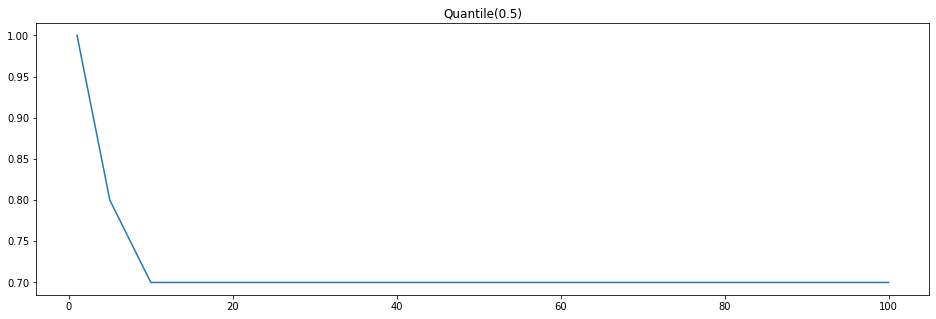

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5))
ax.plot(LRange, [binom(L, p).ppf(0.5)/L for L in LRange])
ax.set_title('Quantile(0.5)')

Calcul de la probability mass function

In [26]:
k=[1,2,3]

In [28]:
binom.pmf(k,6,0.7).sum()

0.2549610000000001

In [10]:
n, p = 5, 0.4
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

In [11]:
mean

array(2.)

#### Question 2

In [48]:
rng = np.random.RandomState(1)
X = np.sort(5 *rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 *(0.5 -rng.rand(16))
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_test = np.sin(X_test).ravel()

In [33]:
X.shape

(80, 1)

In [34]:
y.shape

(80,)

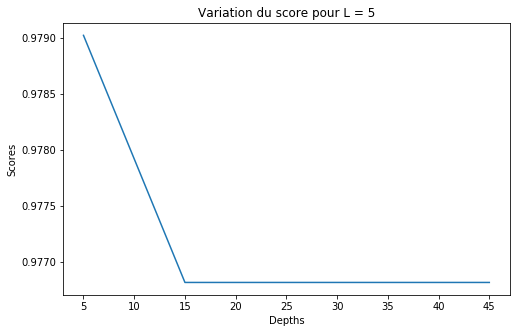

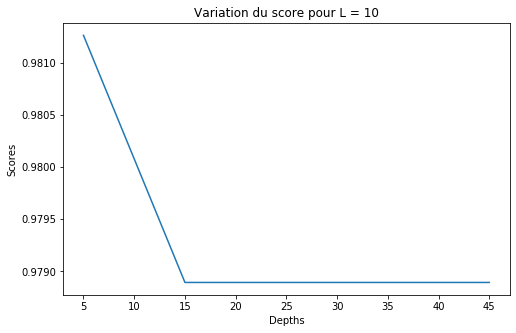

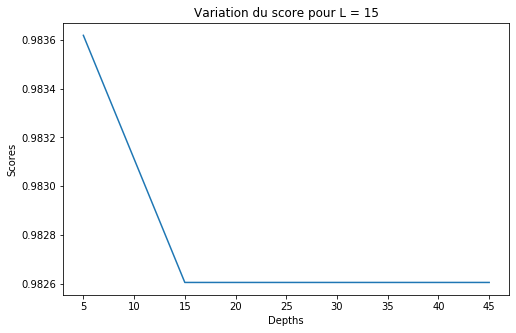

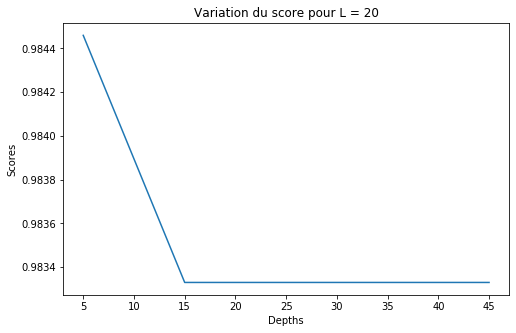

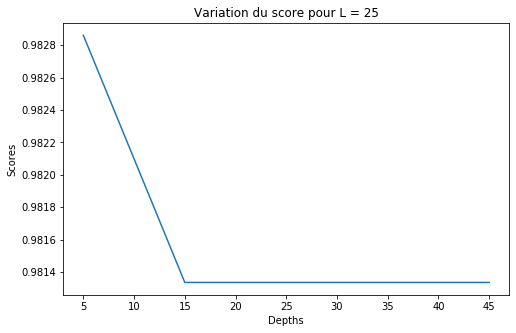

In [82]:
depths = np.arange(5,50,10)
estimators = [5, 10, 15, 20, 25]
for estimator in estimators:
    scores = []
    for depth in depths:
        regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=depth),n_estimators=estimator, random_state=0).fit(X, y)
        score = regr.score(X_test, y_test)
        scores.append(score)
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    ax.plot(depths,scores)
    ax.set_title('Variation du score pour L = '+str(estimator))
    ax.set_xlabel('Depths')
    ax.set_ylabel('Scores')    